In [1]:
import pandas as pd
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def combine_dicts(dict1, dict2):
    combined = dict1.copy()  # Start with a copy of the first dictionary
    for key, value in dict2.items():
        combined[key] = combined.get(key, 0) + value  # Add values or set to value if key is new
    return combined

In [3]:
data_fp = "data/2019-Oct.csv"

# Get the total number of rows in the CSV file
total_rows = sum(1 for _ in open(data_fp)) - 1  # Subtract 1 for the header
chunksize = 100000
total_chunks = total_rows // chunksize + (total_rows % chunksize > 0)  # Calculate total chunks

# Initialize counters
product_counter = {}
user_counter = {}
session_counter = {}

# Use tqdm to wrap the iterable and specify the total number of chunks
with tqdm(total=total_chunks, desc="Processing chunks") as pbar:
    for chunk in pd.read_csv(data_fp, chunksize=chunksize):
        purchase_chunk = chunk[chunk["event_type"] == "purchase"]
        products = purchase_chunk["product_id"]
        users = purchase_chunk["user_id"]
        sessions = purchase_chunk["user_session"]

        product_counter = combine_dicts(product_counter, dict(Counter(products)))
        user_counter = combine_dicts(user_counter, dict(Counter(users)))
        session_counter = combine_dicts(session_counter, dict(Counter(sessions)))

        pbar.update(1)  # Update the progress bar after processing each chunk

Processing chunks: 100%|██████████| 425/425 [00:39<00:00, 10.70it/s]


In [4]:
def plot_frequency(dictionary, title=None):
    sorted_freq = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
    frequencies = list(sorted_freq.values())
    plt.plot(frequencies)
    plt.ylabel("Frequency")
    plt.xlabel("Items in Descending Frequency Order")
    plt.title(title)
    plt.show()

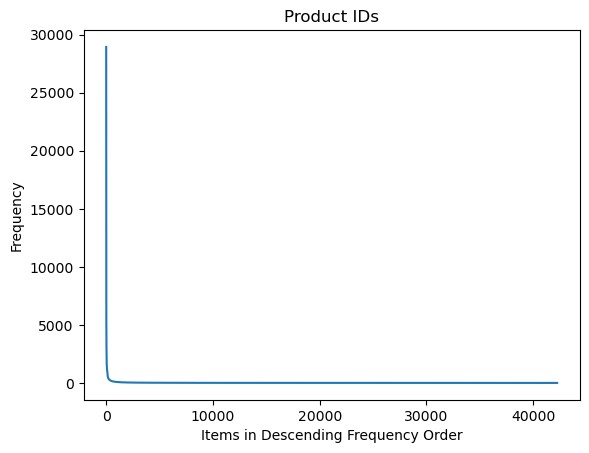

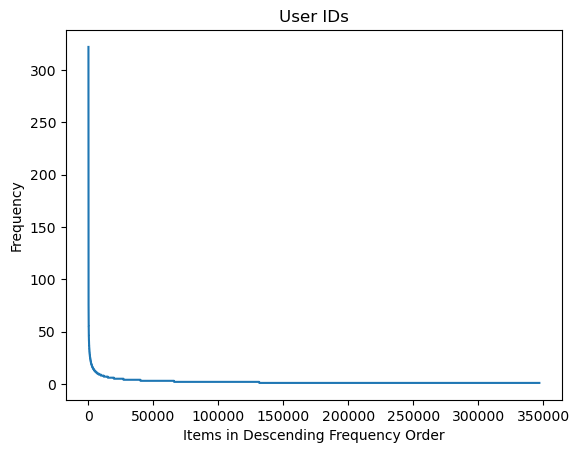

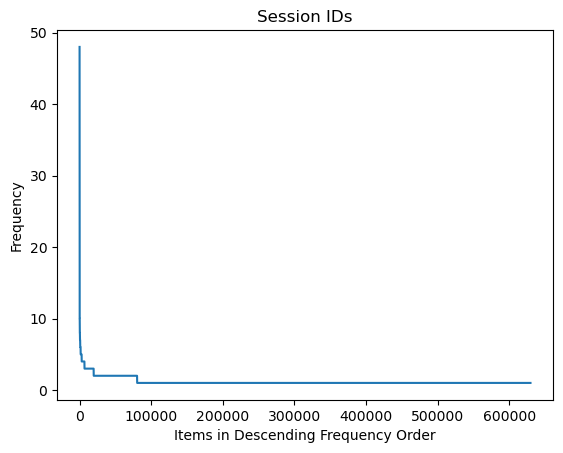

In [5]:
plot_frequency(product_counter, title="Product IDs")
plot_frequency(user_counter, title="User IDs")
plot_frequency(session_counter, title="Session IDs")

In [6]:
def get_avg_median(freq_dict):
    item_count = np.array([v for _, v in freq_dict.items()])
    return np.average(item_count), np.median(item_count)
    

In [7]:
print(f"(Average, median) of product frequencies: {get_avg_median(product_counter)}")
print(f"(Average, median) of user frequencies: {get_avg_median(user_counter)}")
print(f"(Average, median) of session frequencies: {get_avg_median(session_counter)}")

(Average, median) of product frequencies: (17.58597097606591, 2.0)
(Average, median) of user frequencies: (2.1400474766505915, 1.0)
(Average, median) of session frequencies: (1.1799494885316728, 1.0)


In [8]:
print(f"Num unique products: {len(product_counter)}")
print(f"Num unique users: {len(user_counter)}")
print(f"Num unique sessions: {len(session_counter)}")

Num unique products: 42241
Num unique users: 347118
Num unique sessions: 629560


In [9]:
user_counter_gte_5_purchases = {item[0]: item[1] for item in user_counter.items() if item[1] >= 5}
print(f"Num users with >= 5 purchases: {len(user_counter_gte_5_purchases)}")

Num users with >= 5 purchases: 26899
